In [2]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------- ----------------------- 3.4/8.1 MB 20.5 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 14.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 14.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 19.2 MB/s  0:00:00

   ---------------------------------------- 0/6 [pyparsing]
   ------ --------------------------------- 1/6 [kiwisolver]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv("1 - Sample - Superstore.csv", encoding="ANSI")

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

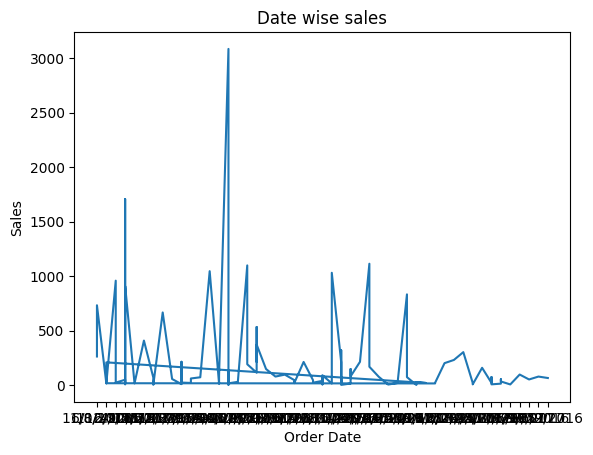

In [6]:
#              X               Y
plt.plot(df['Order Date'].iloc[0:100], df['Sales'].iloc[0:100])
plt.title("Date wise sales")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.show()

In [7]:
category_sales = df.groupby('Category')['Sales'].sum()

In [8]:
category_sales

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

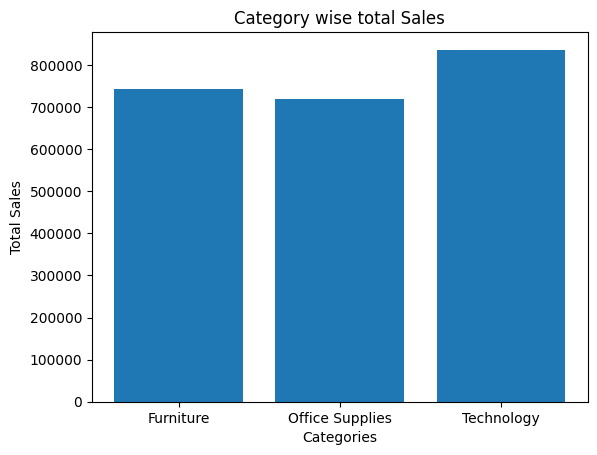

In [9]:
plt.bar(category_sales.index, category_sales.values)
plt.xlabel("Categories")
plt.ylabel("Total Sales")
plt.title("Category wise total Sales")
plt.show()

In [10]:
state_profit = df.groupby("State")["Profit"].sum()

In [11]:
state_profit

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76381.3871
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12607.8870
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24463.1876
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

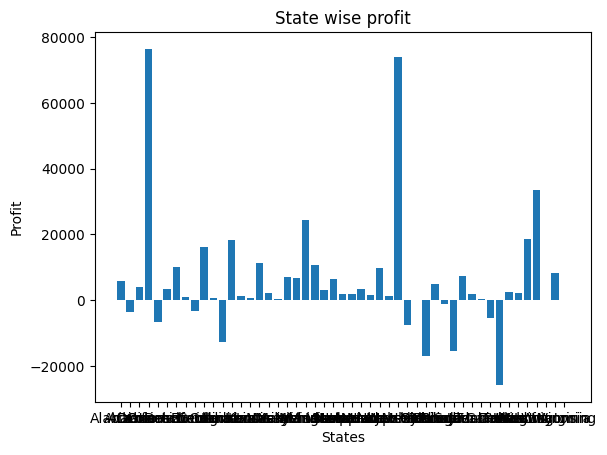

In [12]:
plt.bar(state_profit.index, state_profit.values)
plt.xlabel("States")
plt.ylabel("Profit")
plt.title("State wise profit")
plt.show()

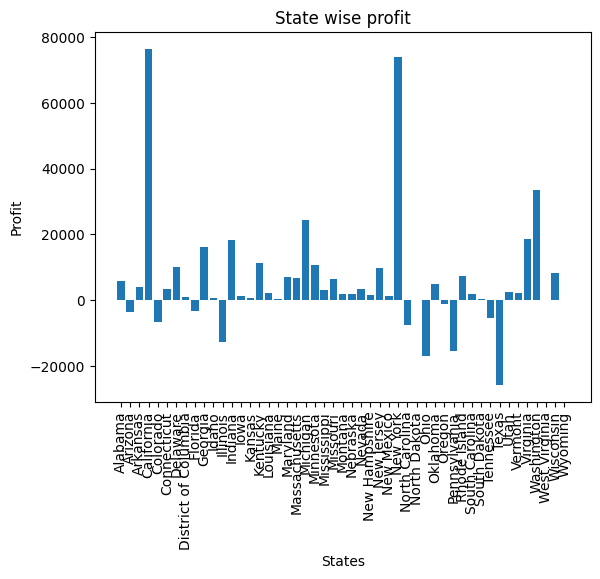

In [13]:
plt.bar(state_profit.index, state_profit.values)
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Profit")
plt.title("State wise profit")
plt.show()

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [15]:
df['Order Date']

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [16]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.astype(str)

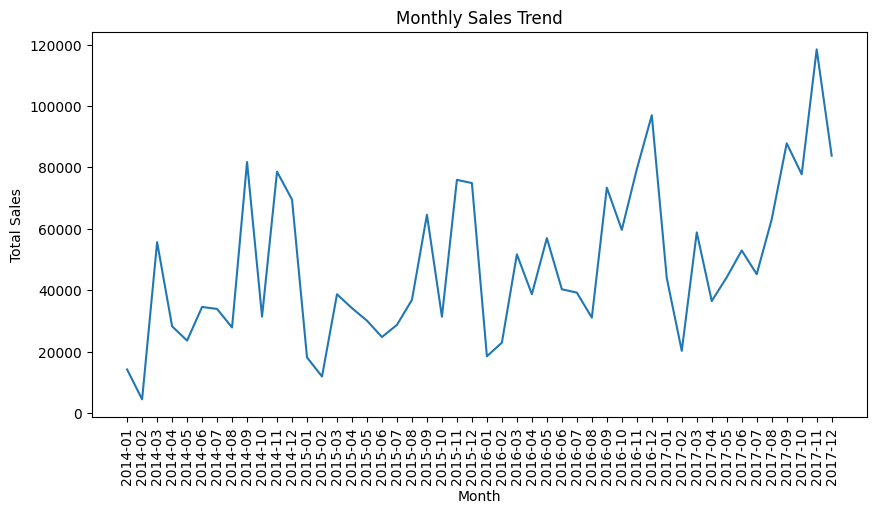

In [17]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.show()
